<a href="https://colab.research.google.com/github/YifanXu1999/VAE/blob/master/NormalNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.functional as F
from torchvision.datasets import CIFAR10
from torchvision.datasets import CIFAR100

from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [0]:
trainSet = DataLoader(CIFAR10(root='./data', train=True, transform=transforms.ToTensor(), download=True), shuffle=True, batch_size=128)

Files already downloaded and verified


In [0]:
testSet = DataLoader(CIFAR10(root='./data', train=False, transform=transforms.ToTensor(), download=True), shuffle=True, batch_size=16)

Files already downloaded and verified


In [0]:
class NormalNN(nn.Module):

  def __init__(self, hidden_size=500):
    super(NormalNN, self).__init__()
    self.l1 = nn.Linear(32 * 32 * 3, hidden_size)
    self.output = nn.Linear(hidden_size, 32 * 32 * 3)
  
  def forward(self, x_in):
    x_in = torch.relu(self.l1(x_in.view(-1, 32 * 32 * 3)))
    x_out = torch.sigmoid(self.output(x_in))
    return x_out.view(-1, 3, 32, 32)



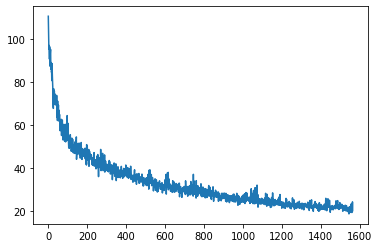

In [0]:
def criterion (x_out, x_in):
  loss = 0.5 * torch.pow((x_out - x_in), 2).sum() / x_out.size(0)
  return loss

def train(dataSet, model, optimizer, epochs=4):
  losses = []
  for epoch in range(epochs):
    for images, _ in dataSet:
      optimizer.zero_grad()
      x_in = images
      x_out = model(x_in)
      loss = criterion(x_out, x_in)
      loss.backward()
      optimizer.step()
      losses.append(loss)
  return losses
model = NormalNN()
optimizer = torch.optim.Adam(model.parameters())

losses = train(trainSet, model, optimizer)
plt.plot(losses)
plt.show()



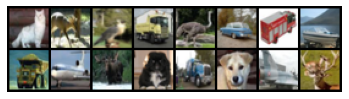

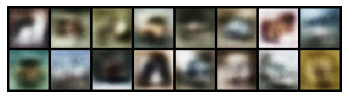

tensor(22.2948)


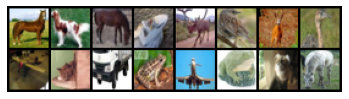

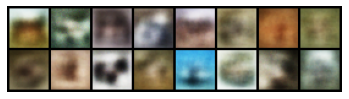

tensor(22.7396)


In [0]:
def imshow(img):
    npimg = img.numpy()
    
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.axis('off')
    plt.show()

imgs, _ = iter(testSet).next()


def visualize(images, model):
  x_in = images[0: 16]
  x_out = model(x_in).data
  loss = criterion(x_in, x_out)
  imshow(make_grid(x_in))
  imshow(make_grid(x_out))
  return loss

loss = visualize(iter(testSet).next()[0], model)
print(loss)